
# <font color='indianred'>Sketch</font><font color='cornflowerblue'>thetic</font> - Slope 5



In [1]:
%%javascript
IPython.OutputArea.prototype._should_scroll = function(lines) {
    return false;
}

<IPython.core.display.Javascript object>

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import bruges
import collections
from matplotlib import colors
from PIL import Image

%matplotlib inline
%config InlineBackend.figure_format = 'svg'

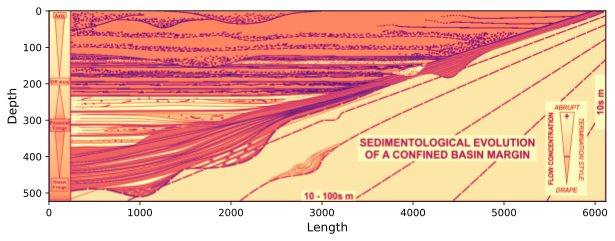

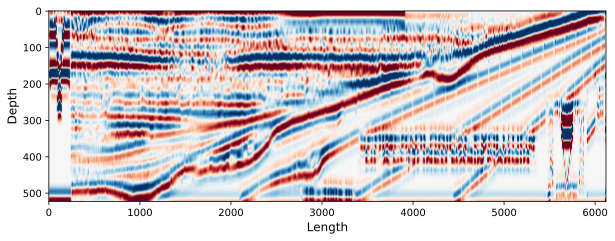

In [5]:
def sketchthetic(image, frequency):
    
    ### Load image fill and resize ###
    
    channel = np.asarray(Image.open(image))
    x = channel.shape[0] 
    y = channel.shape[1] * channel.shape[2] 
    channel.resize((x,y))
    plt.figure(figsize = (10, 5))
    plt.xlabel('Length', fontsize = 12)
    plt.ylabel('Depth', fontsize = 12)
    plt.imshow(channel, aspect = 4, cmap = 'magma')
    
    ### Find most frequent image array values and sort ###
    
    flattened = channel.flatten()
    counted = collections.Counter(flattened)
    counted = {k: v for k, v in sorted(counted.items(), key=lambda item: item[1], reverse = True)}
    keys = np.array(list(counted.keys()))
    keys = sorted(keys[0:5])
    
    ### Collapse image array by most frequent values and assign single values ###

    channel = np.where((channel > 0) & (channel <= (keys[1])), 1, channel)
    channel = np.where((channel > keys[1]) & (channel <= keys[2]), 2, channel)
    channel = np.where((channel > keys[2]) & (channel <= keys[3]), 3, channel)
    channel = np.where((channel > keys[3]) & (channel <= keys[4]), 4, channel)
    channel = np.where((channel > keys[4]), 5, channel)
    
    ### Assign sonic and density values [Vp, rho] ###
    
    zero = [2700, 2750]
    one = [3100, 3150] 
    two = [2200, 2250]
    three = [2800, 3000]
    four = [3100, 3150]
    
    ### Make array of "rocks" and index into image array ###

    rocks = np.array([zero, one, two, three, four])
    earth = rocks[channel]
    
    ### Calculate acoustic impedance ###
    
    imp = np.apply_along_axis(np.product, -1, earth)
    rc = np.diff(imp, axis=0)
    
    ### Create wavelet and convolve with image ###

    w = bruges.filters.ricker(duration = 0.1, dt = 0.001, f = frequency)
    synth = np.apply_along_axis(lambda t: np.convolve(t, w, mode = 'same'), axis = 0, arr = rc)
    
    ### Plot ###
    
    plt.figure(figsize = (10, 10))
    plt.imshow(synth, cmap = "RdBu", aspect = 4, vmin = -1e6, vmax = 1e6)
    plt.xlabel('Length', fontsize = 12)
    plt.ylabel('Depth', fontsize = 12)
    plt.show()

sketchthetic('sketches/annot.png', 15)